In [2]:
import tensorflow as tf

print("tensorflow version:", tf.__version__)

tensorflow version: 2.16.2


In [4]:
print("\nAvailable devices:")
for device in tf.config.list_physical_devices():
    print(device)


Available devices:
PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')
PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


In [5]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_valid, y_valid) = mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
y_train.shape

(60000,)

In [8]:
x_valid.shape

(10000, 28, 28)

In [9]:
y_valid.shape

(10000,)

In [10]:
import matplotlib.pyplot as plt


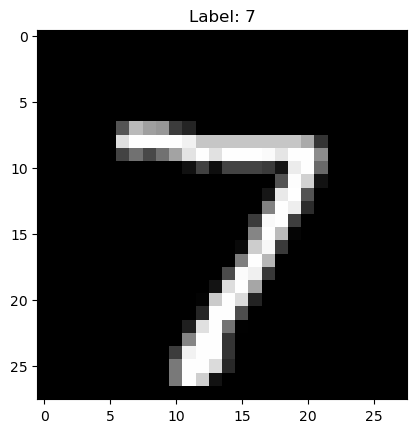

In [12]:
plt.imshow(x_valid[0], cmap='gray')
plt.title(f"Label: {y_valid[0]}")
plt.show()


In [13]:
x_train.min()

0

In [14]:
x_train.max()

255

In [15]:
y_train.min()

0

In [16]:
y_train.max()

9

In [29]:
x_train[0][1]

0

In [30]:
x_train = x_train.reshape(60000, 28*28)

In [31]:
x_valid = x_valid.reshape(10000, 28*28)

In [32]:
x_train.shape

(60000, 784)

In [33]:
x_valid.shape

(10000, 784)

In [34]:
x_train = x_train / x_train.max()

In [35]:
x_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [36]:
x_valid = x_valid / x_valid.max()

In [37]:
x_valid[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [38]:
x_valid.dtype

dtype('float64')

In [39]:
y_train[0]

5

In [40]:
import tensorflow.keras as keras
num_cat = 10

y_train = keras.utils.to_categorical(y_train, num_cat)
y_valid = keras.utils.to_categorical(y_valid, num_cat)

In [41]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

model = Sequential()
model.add(Input(shape=(784,))) ## Input layer
model.add(Dense(units=512, activation='relu'))  ## Hidden layer

In [46]:
model.add(Dense(units=512, activation='relu'))  ## 2nd Hidden layer

In [47]:
model.add(Dense(units=10, activation='softmax')) ## Output layer

In [48]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 669,706 (2.55 MB)

 Trainable params: 669,706 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

In [49]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

In [50]:
history = model.fit(x_train, y_train, epochs=5, verbose=1, validation_data=(x_valid, y_valid))

Epoch 1/5


2025-08-26 04:42:02.482261: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
2025-08-26 04:42:02.485390: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 11ms/step - accuracy: 0.9438 - loss: 0.1865 - val_accuracy: 0.9726 - val_loss: 0.0910
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9760 - loss: 0.0854 - val_accuracy: 0.9757 - val_loss: 0.0915
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.9825 - loss: 0.0621 - val_accuracy: 0.9760 - val_loss: 0.0965
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9862 - loss: 0.0487 - val_accuracy: 0.9778 - val_loss: 0.0939
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9895 - loss: 0.0371 - val_accuracy: 0.9811 - val_loss: 0.0841


In [52]:
model.save("predict_number.keras")

In [59]:
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
import numpy as np

img = Image.open('test.png').convert('L')
# img = ImageOps.invert(img)
img = img.resize((28, 28), Image.NEAREST)
img_arr = np.array(img)

img_arr = img_arr / 255.0

img_arr = img_arr.reshape(1, 784)

img_arr

array([[0.07058824, 0.07058824, 0.06666667, 0.07843137, 0.07843137,
        0.07843137, 0.07843137, 0.07843137, 0.07058824, 0.08235294,
        0.0745098 , 0.07843137, 0.07058824, 0.06666667, 0.07058824,
        0.07843137, 0.07843137, 0.0745098 , 0.08235294, 0.07843137,
        0.07058824, 0.06666667, 0.06666667, 0.08235294, 0.07843137,
        0.08235294, 0.0745098 , 0.07843137, 0.0627451 , 0.06666667,
        0.07058824, 0.08235294, 0.07058824, 0.0745098 , 0.06666667,
        0.0627451 , 0.07843137, 0.0745098 , 0.07058824, 0.07843137,
        0.07058824, 0.06666667, 0.08235294, 0.08235294, 0.07843137,
        0.05882353, 0.09019608, 0.06666667, 0.07843137, 0.0745098 ,
        0.06666667, 0.0745098 , 0.08235294, 0.06666667, 0.0745098 ,
        0.07058824, 0.0745098 , 0.08235294, 0.06666667, 0.08235294,
        0.07058824, 0.07058824, 0.07843137, 0.07058824, 0.0627451 ,
        0.07843137, 0.08235294, 0.0745098 , 0.08627451, 0.07843137,
        0.08627451, 0.0627451 , 0.07843137, 0.07

In [60]:
prediction = model.predict(img_arr)
prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


array([[5.3058624e-10, 3.6574352e-08, 1.4434657e-06, 9.9999607e-01,
        1.8628821e-09, 5.0624146e-07, 1.7594521e-11, 1.5379890e-10,
        1.4561863e-06, 4.8849449e-07]], dtype=float32)

In [61]:
np.argmax(prediction)

3